In [1]:
#####################################################################################################################################
##                                                                                                                                 ##
##                                                                                                                                 ## 
##                                                    Loading of Packages                                                          ##
##                                                                                                                                 ##
##                                                                                                                                 ##
##                                                                                                                                 ##   
#####################################################################################################################################
from scipy import signal
import numpy as np
import pandas as pd
import math as m
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm

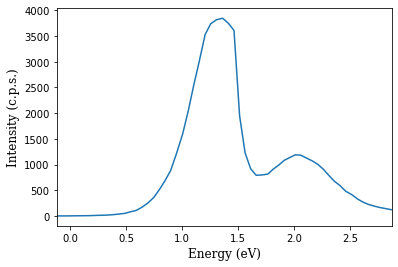

In [97]:
#####################################################################################################################################
##                                                                                                                                 ## 
##                                                       Energy Scan Basic                                                         ##
##                                                                                                                                 ##
#####################################################################################################################################

Directorio = "C:/Users/renea/Desktop/"
File = "ES_data.txt"

Data = Directorio + File

################## Data Loading

DataES = pd.read_csv(Data, sep='\t', skiprows=0)
DataES = DataES.to_numpy()

x = DataES[:,0]
y = DataES[:,1]

plt.xlim(min(x),max(x))
plt.xlabel("Energy (eV)", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Intensity (c.p.s.)", color = "black", family = "Serif", fontsize = 12)

plt.plot(x,y)

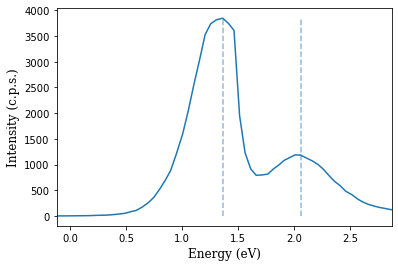

In [104]:
#####################################################################################################################################
##                                                                                                                                 ## 
##                                         Energy Scan with peak detector                                                          ##
##                                                                                                                                 ##
#####################################################################################################################################

Directorio = "C:/Users/renea/Desktop/"
File = "ES_data.txt"

Data = Directorio + File

################## Data Loading

DataES = pd.read_csv(Data, sep='\t', skiprows=0)
DataES = DataES.to_numpy()

x = DataES[:,0]
y = DataES[:,1]

############### Peak detection module

peak_widths = np.arange(1,5)
peak_indices = signal.find_peaks_cwt(y, peak_widths)
peak_count = len(peak_indices)

############## Plot customs

plt.vlines(x[peak_indices[2]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5, alpha = 0.5)
plt.vlines(x[peak_indices[5]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5, alpha = 0.5)

plt.xlim(min(x),max(x))
plt.xlabel("Energy (eV)", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Intensity (c.p.s.)", color = "black", family = "Serif", fontsize = 12)

plt.plot(x,y)

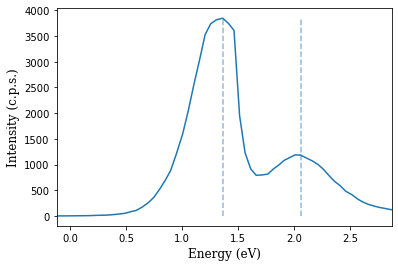

In [103]:
#####################################################################################################################################
##                                                                                                                                 ## 
##                                  Energy Scan with peak detection and identification                                             ##
##                                                                                                                                 ##
#####################################################################################################################################

Directorio = "C:/Users/renea/Desktop/"
File = "ES_data.txt"

Data = Directorio + File

################## Data Loading

DataES = pd.read_csv(Data, sep='\t', skiprows=0)
DataES = DataES.to_numpy()

x = DataES[:,0]
y = DataES[:,1]

############### Peak detection module

peak_widths = np.arange(1,5)
peak_indices = signal.find_peaks_cwt(y, peak_widths)
peak_count = len(peak_indices)

############## Plot customs

plt.vlines(x[peak_indices[2]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5, alpha = 0.5)
plt.vlines(x[peak_indices[5]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5, alpha = 0.5)

plt.xlim(min(x),max(x))
plt.xlabel("Energy (eV)", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Intensity (c.p.s.)", color = "black", family = "Serif", fontsize = 12)

plt.plot(x,y)


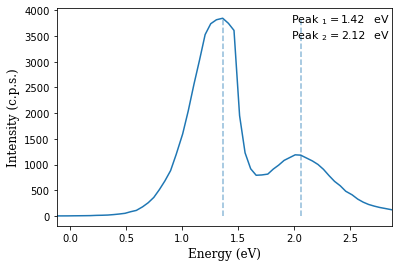

In [102]:
#####################################################################################################################################
##                                                                                                                                 ## 
##                                    Energy Scan with peak detection and identification                                           ##
##                                                                                                                                 ##
#####################################################################################################################################

Directorio = "C:/Users/renea/Desktop/"
File = "ES_data.txt"

Data = Directorio + File

################## Data Loading

DataES = pd.read_csv(Data, sep='\t', skiprows=0)
DataES = DataES.to_numpy()

x = DataES[:,0]
y = DataES[:,1]

############### Peak detection module

peak_widths = np.arange(1,5)
peak_indices = signal.find_peaks_cwt(y, peak_widths)
peak_count = len(peak_indices)

############## Plot customs

plt.vlines(x[peak_indices[2]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5, alpha = 0.5)
plt.vlines(x[peak_indices[5]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5, alpha = 0.5)

plt.xlim(min(x),max(x))
plt.xlabel("Energy (eV)", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Intensity (c.p.s.)", color = "black", family = "Serif", fontsize = 12)

plt.plot(x,y)

############  Peaks identification 

plt.text(max(x)-0.3*(max(x)-min(x)),0.90*max(y), "Peak $_1$ =          eV \nPeak $_2$ =          eV ", fontsize = 11)
plt.text(max(x)-0.15*(max(x)-min(x)),0.98*max(y), float("{0:.2f}".format(x[peak_indices[3]])), fontsize = 11)
plt.text(max(x)-0.15*(max(x)-min(x)),0.90*max(y), float("{0:.2f}".format(x[peak_indices[6]])), fontsize = 11)

#plt.text(max(x)-0.35*(max(x)-min(x)),0.87*max(y), "FWHM = ", fontsize = 12)

##############  Plot file saving 

plt.savefig("C:/Users/renea/Desktop/Energy_scan_sample.png", dpi=350)

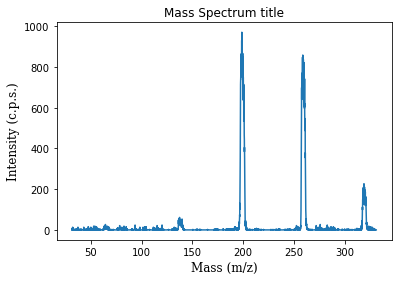

In [51]:
#####################################################################################################################################
##                                                                                                                                 ## 
##                                                         MASS SPECTRUM Simple                                                    ##
##                                                                                                                                 ## 
#####################################################################################################################################

Directorio = "C:/Users/renea/Desktop/"
File = "MS_data.txt"
Data = Directorio + File

DataMS = pd.read_csv(Data, sep='\t', skiprows=0)
DataMS = DataMS.to_numpy()
DataMS = DataMS[0:,0:] 

x = DataMS[0:,0]
y = DataMS[0:,1]

plt.xlabel("Mass (m/z)", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Intensity (c.p.s.)", color = "black", family = "Serif", fontsize = 12)
plt.title("Mass Spectrum title")

plt.plot(x,y)

#plt.savefig("C:/Users/renea/Desktop/MS_sample-a.png", dpi=350)

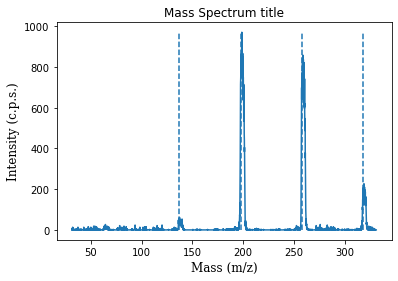

In [47]:
#####################################################################################################################################
##                                                                                                                                 ## 
##                                            MASS SPECTRUM with detected peaks                                                    ##
##                                                                                                                                 ## 
#####################################################################################################################################

Directorio = "C:/Users/renea/Desktop/"
File = "MS_data.txt"

Data = Directorio + File



DataMS = pd.read_csv(Data, sep='\t', skiprows=0)
DataMS = DataMS.to_numpy()
DataMS = DataMS[0:,0:] 

plt.xlabel("Mass (m/z)", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Intensity (c.p.s.)", color = "black", family = "Serif", fontsize = 12)
plt.title("Mass Spectrum title")


x = DataMS[0:,0]
y = DataMS[0:,1]


############### Peak detection module

peak_widths = np.arange(1,300)
peak_indices = signal.find_peaks_cwt(y, peak_widths)
peak_count = len(peak_indices)

############## Peak tracking

plt.vlines(x[peak_indices[6]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5)
plt.vlines(x[peak_indices[8]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5)
plt.vlines(x[peak_indices[10]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5)
plt.vlines(x[peak_indices[12]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5)


plt.plot(x,y)

#plt.savefig("C:/Users/renea/Desktop/MS_sample-a.png", dpi=350)

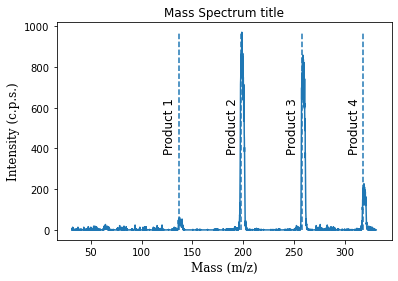

In [46]:
#####################################################################################################################################
##                                                                                                                                 ## 
##                                            MASS SPECTRUM with detected peaks                                                    ##
##                                                                                                                                 ## 
#####################################################################################################################################

Directorio = "C:/Users/renea/Desktop/"
File = "MS_data.txt"

Data = Directorio + File



DataMS = pd.read_csv(Data, sep='\t', skiprows=0)
DataMS = DataMS.to_numpy()
DataMS = DataMS[0:,0:] 

plt.xlabel("Mass (m/z)", color = "black", family = "Serif", fontsize = 12)
plt.ylabel("Intensity (c.p.s.)", color = "black", family = "Serif", fontsize = 12)
plt.title("Mass Spectrum title")


x = DataMS[0:,0]
y = DataMS[0:,1]


############### Peak detection module

peak_widths = np.arange(1,300)
peak_indices = signal.find_peaks_cwt(y, peak_widths)
peak_count = len(peak_indices)

############## Peak tracking

plt.vlines(x[peak_indices[6]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5)
plt.vlines(x[peak_indices[8]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5)
plt.vlines(x[peak_indices[10]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5)
plt.vlines(x[peak_indices[12]], ymin = 0, ymax = max(y),linestyle = "--", linewidth=1.5)

plt.plot(x,y)


##############  Peak identification

plt.text(x[peak_indices[6]]-15,0.40*max(y),"Product 1", rotation = "90", fontsize = 12)
plt.text(x[peak_indices[8]]-15,0.40*max(y),"Product 2", rotation = "90", fontsize = 12)
plt.text(x[peak_indices[10]]-15,0.40*max(y),"Product 3", rotation = "90", fontsize = 12)
plt.text(x[peak_indices[12]]-15,0.40*max(y),"Product 4", rotation = "90", fontsize = 12)


plt.savefig("C:/Users/renea/Desktop/MS_sample-a.png", dpi=350)